# **Deep Learning 101 Workshop**

## **Introduction**
Welcome to the Deep Learning 101 workshop! Today, we'll cover the basics of deep learning, including key concepts such as layers, inputs, activation functions, softmax, and dropout. By the end of this session, you'll have a foundational understanding of how deep learning models work.

## **What is Deep Learning?**
Deep Learning is a subset of machine learning that uses neural networks with many layers (hence "deep") to model complex patterns in data. It's particularly powerful for tasks like image and speech recognition, natural language processing, and more.

## **Key Concepts**

### **1. Layers**
Layers are the building blocks of neural networks. Each layer consists of neurons (or nodes) that receive input, perform a computation, and pass the result to the next layer. There are different types of layers, such as:
- **Input Layer:** The first layer that receives the raw input data.
- **Hidden Layers:** Intermediate layers that process inputs from the previous layer. They are called "hidden" because they are not directly visible from the input or output.
- **Output Layer:** The final layer that produces the output of the network.

### **2. Inputs**
Inputs are the raw data fed into the neural network. They can be anything from pixel values in an image to words in a sentence. Inputs are usually represented as vectors or matrices.

### **3. Activation Functions**
Activation functions introduce non-linearity into the network, allowing it to learn complex patterns. Some common activation functions are:

- **ReLU (Rectified Linear Unit):**
  $$ \text{ReLU}(x) = \max(0, x) $$
  
- **Sigmoid:**
  $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
  
- **Tanh (Hyperbolic Tangent):**
  $$ \text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

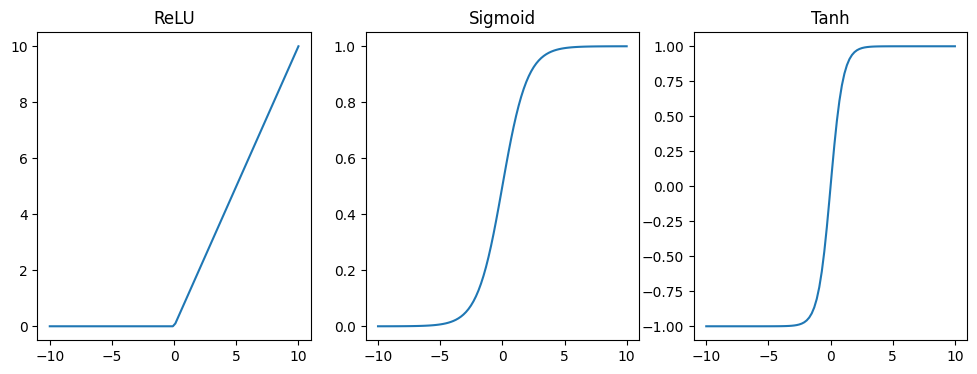

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

relu = np.maximum(0, x)

sigmoid = 1 / (1 + np.exp(-x))

tanh = np.tanh(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, relu)
plt.title('ReLU')

plt.subplot(1, 3, 2)
plt.plot(x, sigmoid)
plt.title('Sigmoid')

plt.subplot(1, 3, 3)
plt.plot(x, tanh)
plt.title('Tanh')

plt.show()

## **Building a Simple Neural Network**
Let's create a simple neural network to classify synthetic data.

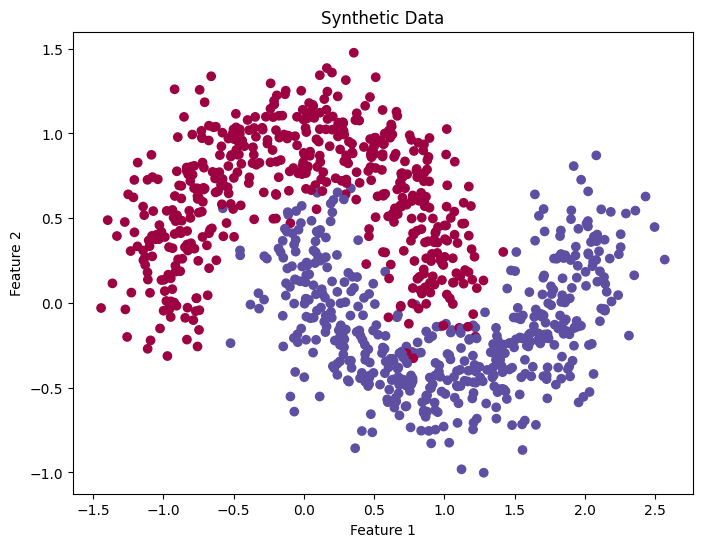

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

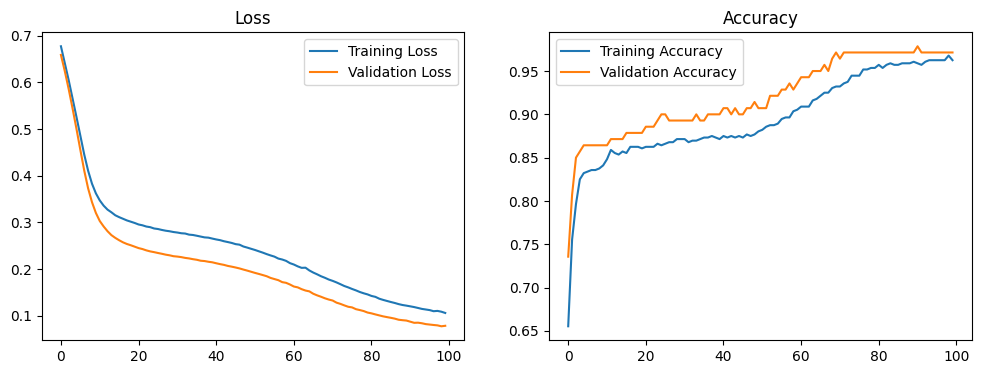

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0775 
Test Loss: 0.0854
Test Accuracy: 0.9733
